In [1]:
import findspark
findspark.init('/home/ec2-user/spark')

In [2]:
import pyspark
from pyspark import SparkContext

In [3]:
sc = SparkContext()

In [33]:
# Creating a RDD
data = ["Hello world how are you? are you ok? thanks world"]
rdd = sc.parallelize(data)

In [34]:
# Now splitting the file using flatMap() function so that we get each word as seperate element of RDD
flatmapRDD = rdd.flatMap(lambda x : x.split(" "))

print("Flat map: ", flatmapRDD.collect())
print("Flat map: ", flatmapRDD.take(3))

# If we use map function to split this, we will get the words splitted but as a single element of RDD
maprdd = rdd.map(lambda x : x.split(" "))
print("\nMap: ",maprdd.collect())
print("Map: ", maprdd.take(3))

Flat map:  ['Hello', 'world', 'how', 'are', 'you?', 'are', 'you', 'ok?', 'thanks', 'world']
Flat map:  ['Hello', 'world', 'how']

Map:  [['Hello', 'world', 'how', 'are', 'you?', 'are', 'you', 'ok?', 'thanks', 'world']]
Map:  [['Hello', 'world', 'how', 'are', 'you?', 'are', 'you', 'ok?', 'thanks', 'world']]


In [35]:
# Now creating key value pair RDD, by mapping each word with key and value.
secondrdd = flatmapRDD.map(lambda word: (word,1))

In [36]:
secondrdd.take(3)

[('Hello', 1), ('world', 1), ('how', 1)]

In [37]:
# Now we will use reduceKey() function to add up the values with similiar keys(words)
thirdrdd = secondrdd.reduceByKey(lambda word,count : word+count)
thirdrdd.collect()

[('Hello', 1),
 ('world', 2),
 ('how', 1),
 ('are', 2),
 ('you?', 1),
 ('you', 1),
 ('ok?', 1),
 ('thanks', 1)]

In [38]:
# Plotting the chart of the word count
import matplotlib.pyplot as plt

In [44]:
# Seperating words and counts into two lists..
words=[]
counts=[]
for x in thirdrdd.collect():
    words.append(x[0])
    counts.append(x[1])

<BarContainer object of 8 artists>

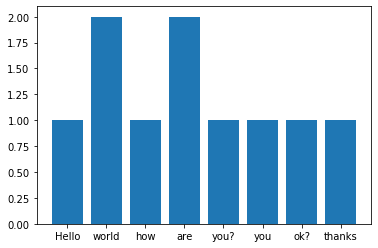

In [47]:
# Plotting bar chart
plt.bar(words,counts)